In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets
import numpy  as np
from matplotlib import colors

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
tgaps = pd.read_csv("../data/tgapsFoM_v1.5.csv") 
tgaps = tgaps.set_index(tgaps.db.apply(lambda x: x.replace("_10yrs.db", 
                                                   "").replace("_v1.5", 
                                            ""))).drop("db", axis=1)
tgaps

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
db,,,,,,,,,,,,,,,,,,,,,
agnddf,10773.203215,8211.584577,17053.204722,5794.473981,NaN,6.743981,20040.485143,23046.227400,7232.683657,666.870561,...,8.789419e+04,32424.668130,4930.500669,847.789379,7.281296e+04,31460.153334,13141.707376,7.579293e+04,39081.724304,70556.829527
alt_dust,12341.104839,10034.017207,18406.773689,6662.479995,NaN,1.255707,24332.448925,25704.484239,11156.369018,1262.533511,...,8.150569e+04,38470.818571,8306.540787,2113.554299,7.014751e+04,37904.224858,21952.694156,6.714988e+04,50707.074846,47672.487777
alt_roll_mod2_dust_sdf_0.20,12946.487613,12122.253436,19333.891292,6643.910044,NaN,1.680488,25198.530019,27676.867361,12179.515252,1191.365293,...,6.703430e+04,48244.921803,11393.436117,3322.109223,7.703816e+04,41835.022812,25221.377186,7.795149e+04,55995.778793,51681.402898
baseline_2snaps,12316.289497,7215.969192,14165.567066,4523.946055,NaN,0.369482,22573.222853,21549.385923,6668.007481,603.249024,...,8.028320e+04,28973.545276,4673.657595,1069.298398,6.650612e+04,30875.305589,14568.925900,6.873746e+04,39682.776446,60924.566688
baseline,11160.552213,8527.314295,16764.323853,5654.886869,NaN,0.114204,26282.772876,24221.060560,7729.310184,637.023803,...,8.945009e+04,32059.835876,5818.518207,1367.111606,5.916743e+04,33271.965745,17713.650884,5.853088e+04,43833.804014,67945.187363
bulges_bs,8925.009590,6712.092150,12592.797606,3716.355642,NaN,0.023803,21601.674983,18216.669925,5540.038807,500.752346,...,7.045157e+04,25244.206588,4091.953514,841.027523,4.721176e+04,25666.580879,12803.156484,4.687714e+04,33782.502100,70082.655059
bulges_bulge_wfd,11272.932227,6442.925598,12886.682898,3861.398400,NaN,0.070410,20758.417778,17760.604271,5434.079681,468.756169,...,7.148615e+04,24542.446506,3980.249624,767.188547,4.633244e+04,25470.819787,13000.785495,4.621236e+04,33419.046230,69454.574781
bulges_cadence_bs,11484.494878,6685.031192,12526.437116,3958.005731,NaN,11.160749,21785.436984,18168.310739,5627.573263,424.787512,...,7.190848e+04,25606.449324,4372.754693,885.473703,4.535468e+04,25767.266930,12675.475218,4.723687e+04,33038.869572,71122.686208
bulges_cadence_bulge_wfd,11109.606995,6656.696114,12121.286378,3904.676336,NaN,2.526806,22307.805134,17719.659608,5536.232303,348.070549,...,7.024275e+04,24967.650615,4443.636487,772.136076,4.603185e+04,25388.409613,12571.021509,4.521904e+04,33093.464686,71086.309887


In [47]:
filters = ['u','g','r','i','z','y']
tgaps_color = tgaps.copy()

In [48]:
for f in filters:
    for g in filters:
        if f == g and f+g in tgaps_color.columns:
            tgaps_color.drop(f+g, axis=1, inplace=True)
        else:
            if f+g in tgaps.columns:
                tgaps.drop(f+g, axis=1, inplace=True)

In [50]:
tgaps_color

,ug,ur,ui,uz,uy,gr,gi,gz,gy,ri,rz,ry,iz,iy,zy
db,,,,,,,,,,,,,,,
agnddf,8211.584577,17053.204722,5794.473981,NaN,6.743981,23046.227400,7232.683657,666.870561,227.144595,32424.668130,4930.500669,847.789379,31460.153334,13141.707376,39081.724304
alt_dust,10034.017207,18406.773689,6662.479995,NaN,1.255707,25704.484239,11156.369018,1262.533511,563.543569,38470.818571,8306.540787,2113.554299,37904.224858,21952.694156,50707.074846
alt_roll_mod2_dust_sdf_0.20,12122.253436,19333.891292,6643.910044,NaN,1.680488,27676.867361,12179.515252,1191.365293,656.725476,48244.921803,11393.436117,3322.109223,41835.022812,25221.377186,55995.778793
baseline_2snaps,7215.969192,14165.567066,4523.946055,NaN,0.369482,21549.385923,6668.007481,603.249024,82.164425,28973.545276,4673.657595,1069.298398,30875.305589,14568.925900,39682.776446
baseline,8527.314295,16764.323853,5654.886869,NaN,0.114204,24221.060560,7729.310184,637.023803,267.031454,32059.835876,5818.518207,1367.111606,33271.965745,17713.650884,43833.804014
bulges_bs,6712.092150,12592.797606,3716.355642,NaN,0.023803,18216.669925,5540.038807,500.752346,125.252781,25244.206588,4091.953514,841.027523,25666.580879,12803.156484,33782.502100
bulges_bulge_wfd,6442.925598,12886.682898,3861.398400,NaN,0.070410,17760.604271,5434.079681,468.756169,110.136006,24542.446506,3980.249624,767.188547,25470.819787,13000.785495,33419.046230
bulges_cadence_bs,6685.031192,12526.437116,3958.005731,NaN,11.160749,18168.310739,5627.573263,424.787512,285.791803,25606.449324,4372.754693,885.473703,25767.266930,12675.475218,33038.869572
bulges_cadence_bulge_wfd,6656.696114,12121.286378,3904.676336,NaN,2.526806,17719.659608,5536.232303,348.070549,183.974201,24967.650615,4443.636487,772.136076,25388.409613,12571.021509,33093.464686


In [51]:
tgaps

,uu,gg,rr,ii,zz,yy
db,,,,,,
agnddf,10773.203215,20040.485143,8.789419e+04,7.281296e+04,7.579293e+04,70556.829527
alt_dust,12341.104839,24332.448925,8.150569e+04,7.014751e+04,6.714988e+04,47672.487777
alt_roll_mod2_dust_sdf_0.20,12946.487613,25198.530019,6.703430e+04,7.703816e+04,7.795149e+04,51681.402898
baseline_2snaps,12316.289497,22573.222853,8.028320e+04,6.650612e+04,6.873746e+04,60924.566688
baseline,11160.552213,26282.772876,8.945009e+04,5.916743e+04,5.853088e+04,67945.187363
bulges_bs,8925.009590,21601.674983,7.045157e+04,4.721176e+04,4.687714e+04,70082.655059
bulges_bulge_wfd,11272.932227,20758.417778,7.148615e+04,4.633244e+04,4.621236e+04,69454.574781
bulges_cadence_bs,11484.494878,21785.436984,7.190848e+04,4.535468e+04,4.723687e+04,71122.686208
bulges_cadence_bulge_wfd,11109.606995,22307.805134,7.024275e+04,4.603185e+04,4.521904e+04,71086.309887


In [112]:
shape_metric  = tgaps.mean(axis=1) 
shape_metric /= shape_metric.max()
color_metric  = tgaps_color.mean(axis=1)
color_metric /= color_metric.max()


In [113]:
shape_metric

db
agnddf                          0.049927
alt_dust                        0.044796
alt_roll_mod2_dust_sdf_0.20     0.046082
baseline_2snaps                 0.046007
baseline                        0.046184
bulges_bs                       0.039181
bulges_bulge_wfd                0.039235
bulges_cadence_bs               0.039734
bulges_cadence_bulge_wfd        0.039306
bulges_cadence_i_heavy          0.038931
bulges_i_heavy                  0.038607
daily_ddf                       0.050128
dcr_nham1_ug                    0.051553
dcr_nham1_ugr                   0.063321
dcr_nham1_ugri                  0.056602
dcr_nham2_ug                    0.052679
dcr_nham2_ugr                   0.062115
dcr_nham2_ugri                  0.064625
descddf                         0.046015
filterdist_indx1                0.051179
filterdist_indx2                0.050720
filterdist_indx3                0.048774
filterdist_indx4                0.046025
filterdist_indx5                0.055517
filterdist_in

In [54]:
color_metric

db
agnddf                          12275.031778
alt_dust                        15549.757630
alt_roll_mod2_dust_sdf_0.20     17721.256972
baseline_2snaps                 11643.477857
baseline                        13191.063437
bulges_bs                        9988.894010
bulges_bulge_wfd                 9876.345975
bulges_cadence_bs               10002.225836
bulges_cadence_bulge_wfd         9847.296085
bulges_cadence_i_heavy           9863.525939
bulges_i_heavy                   9825.398697
daily_ddf                       11457.370401
dcr_nham1_ug                    12462.290914
dcr_nham1_ugr                   12070.635979
dcr_nham1_ugri                  12081.637345
dcr_nham2_ug                    11578.943883
dcr_nham2_ugr                   11396.175568
dcr_nham2_ugri                  11113.752347
descddf                         12218.163788
filterdist_indx1                14571.956550
filterdist_indx2                15027.191833
filterdist_indx3                14090.593417
filterd

In [55]:
sorted_indices = shape_metric.sort_values(ascending=False).index

In [97]:
osroots = np.unique(np.array(['_'.join(os.split("_")[:1]) for os in sorted_indices]))

In [98]:
osroots

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype='<U10')

In [58]:
color_metric.sort_values(ascending=False)

db
short_exp_5ns_5expt              21440.240301
short_exp_5ns_1expt              21360.572735
rolling_mod6_sdf_0.10            19601.755937
rolling_mod6_sdf_0.20            18596.055011
alt_roll_mod2_dust_sdf_0.20      17721.256972
short_exp_2ns_5expt              17263.446912
short_exp_2ns_1expt              16999.149794
footprint_stuck_rollingv1.5      16378.360626
wfd_depth_scale0.99_noddf        15795.090743
rolling_mod3_sdf_0.10            15728.832045
filterdist_indx7                 15636.120346
var_expt                         15590.995627
alt_dust                         15549.757630
footprint_big_sky_nouiyv1.5      15453.254878
rolling_mod3_sdf_0.20            15236.214677
filterdist_indx2                 15027.191833
wfd_depth_scale0.95_noddf        15018.986387
footprint_big_skyv1.5            14997.185807
wfd_depth_scale0.99              14804.838957
filterdist_indx1                 14571.956550
filterdist_indx8                 14322.316114
third_obs_pt90v1.5             

In [69]:
tdepth = pd.read_csv("../data/df_depthFoM.csv", index_col=False) 
tdepth = tdepth.set_index(tdepth.db.apply(lambda x: x.replace("_10yrs.db", 
                                                   "").replace("_v1.5", 
                                            ""))).drop(["db","Unnamed: 0"], 
                                                       axis=1)
mag_stretch = {'u':24.0, 'g':25.1, 'r':24.8, 'i':24.1, 'z':23.4, 'y':22.2 }

for f in mag_stretch.keys():
    tdepth[f] = 1 - (mag_stretch[f] - tdepth[f])
tdepth

,g,i,r,u,y,z
db,,,,,,
agnddf,0.420841,0.312917,0.224873,0.565969,0.792475,0.369313
alt_dust,0.377675,0.257232,0.171687,0.522699,0.739273,0.313092
alt_roll_mod2_dust_sdf_0.20,0.359075,0.191644,0.105499,0.515063,0.695493,0.264684
baseline_2snaps,0.348970,0.286586,0.184788,0.377364,0.783992,0.360203
baseline,0.415811,0.299556,0.216739,0.574092,0.795174,0.368452
bulges_bs,0.419510,0.310157,0.217870,0.573930,0.798544,0.374075
bulges_bulge_wfd,0.417617,0.314427,0.217864,0.574174,0.796370,0.378369
bulges_cadence_bs,0.414875,0.312798,0.217984,0.572009,0.794497,0.377059
bulges_cadence_bulge_wfd,0.411278,0.318793,0.216744,0.574792,0.795320,0.375519


In [83]:
depth = tdepth.mean(axis=1)
depth

db
agnddf                          0.447731
alt_dust                        0.396943
alt_roll_mod2_dust_sdf_0.20     0.355243
baseline_2snaps                 0.390317
baseline                        0.444971
bulges_bs                       0.449014
bulges_bulge_wfd                0.449803
bulges_cadence_bs               0.448204
bulges_cadence_bulge_wfd        0.448741
bulges_cadence_i_heavy          0.449266
bulges_i_heavy                  0.446551
daily_ddf                       0.442123
dcr_nham1_ug                    0.385541
dcr_nham1_ugr                   0.389907
dcr_nham1_ugri                  0.386646
dcr_nham2_ug                    0.353988
dcr_nham2_ugr                   0.355480
dcr_nham2_ugri                  0.347708
descddf                         0.450781
filterdist_indx1                0.433401
filterdist_indx2                0.460959
filterdist_indx3                0.442887
filterdist_indx4                0.446260
filterdist_indx5                0.478992
filterdist_in

In [75]:
tfootprint_eg = pd.read_csv("../data/Nfields_v1.5.csv") 
tfootprint_eg = tfootprint_eg.set_index(tfootprint_eg.db.apply(lambda x: x.replace("_10yrs.db", 
                                                   "").replace("_v1.5", 
                                            ""))).drop("db", axis=1)
tfootprint_eg

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
db,,,,,,,,,,,,,,,,,,,,,
agnddf,775,654,770,697,0,44,647,647,646,565,...,641,752,581,341,594,551,431,614,524,610
alt_dust,219,602,662,809,0,26,140,585,871,830,...,72,716,920,743,81,554,876,108,778,181
alt_roll_mod2_dust_sdf_0.20,311,843,652,899,0,50,306,705,983,826,...,34,879,1063,963,56,695,1052,85,889,210
baseline_2snaps,232,390,409,442,0,24,151,391,448,533,...,51,440,545,406,56,372,451,88,465,158
baseline,710,702,721,686,0,23,727,716,684,540,...,730,730,727,511,730,716,695,730,713,730
bulges_bs,172,387,297,318,0,11,65,210,304,440,...,11,352,488,310,15,210,328,15,363,55
bulges_bulge_wfd,141,353,308,339,0,19,55,180,341,458,...,3,330,476,280,5,172,316,11,325,39
bulges_cadence_bs,165,395,281,374,0,43,54,192,349,397,...,9,352,459,326,10,214,332,16,321,40
bulges_cadence_bulge_wfd,125,375,238,330,0,41,53,158,352,378,...,3,339,481,292,5,150,301,9,310,39


In [77]:
tfootprint_gal = pd.read_csv("../data/Nstars_v1.5.csv") 
tfootprint_gal = tfootprint_gal.set_index(tfootprint_gal.db.apply(lambda x: x.replace("_10yrs.db", 
                                                   "").replace("_v1.5", 
                                            ""))).drop("db", axis=1)
tfootprint_gal

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
db,,,,,,,,,,,,,,,,,,,,,
agnddf,52458192,48929580,43190784,40661208,0,623016,50989032,44003196,48031524,39358152,...,44323776,51670548,42828768,21088764,42071796,42751332,34409340,44836452,39070476,44400564
alt_dust,8136216,25199856,20582100,27798660,0,321732,7296840,21031092,32474376,29766780,...,4724100,26813196,30461652,29269368,4610016,16126524,28423944,5058792,26276364,8782632
alt_roll_mod2_dust_sdf_0.20,8262144,27888156,19595628,29964384,0,5391612,10748016,24450408,33928956,30519612,...,980028,30344508,35355600,31470120,3395052,21218940,32280732,4352364,29177568,8175168
baseline_2snaps,22826844,30526020,27771696,34534836,0,2284920,15012504,28010628,34249824,34020072,...,5420340,36547452,36499716,25751808,8399592,24056748,31739688,8838792,31866840,12217680
baseline,52748928,47301120,50705856,49051404,0,134496,53421552,49623300,45503028,34864884,...,51374304,54224712,47176488,24384780,52315164,51658956,50000040,50667012,46102248,48173220
bulges_bs,7885476,19666476,14978592,12681828,0,72684,4654836,13971420,18354276,23281668,...,1190736,20658204,24521472,16812396,1342620,14423616,25076484,1346580,23720580,4809024
bulges_bulge_wfd,7274340,20342628,16575156,16783596,0,384516,3935592,10831824,20550996,29953044,...,578520,23756940,24761880,15474456,484092,7702344,15709248,1288836,17605332,2769480
bulges_cadence_bs,7131240,20430576,14031864,20787948,0,4135356,4418640,13853916,19958724,20009484,...,1154268,24681672,21866508,21574476,839376,10641636,18172908,1296972,17475984,1819404
bulges_cadence_bulge_wfd,7257492,18782640,8339112,11271096,0,1194804,4795236,6898824,17442360,23671404,...,96516,23533272,20734056,14986008,443052,7725096,15275232,460188,18132012,3493728


In [78]:
tfootprint_gal

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
db,,,,,,,,,,,,,,,,,,,,,
agnddf,52458192,48929580,43190784,40661208,0,623016,50989032,44003196,48031524,39358152,...,44323776,51670548,42828768,21088764,42071796,42751332,34409340,44836452,39070476,44400564
alt_dust,8136216,25199856,20582100,27798660,0,321732,7296840,21031092,32474376,29766780,...,4724100,26813196,30461652,29269368,4610016,16126524,28423944,5058792,26276364,8782632
alt_roll_mod2_dust_sdf_0.20,8262144,27888156,19595628,29964384,0,5391612,10748016,24450408,33928956,30519612,...,980028,30344508,35355600,31470120,3395052,21218940,32280732,4352364,29177568,8175168
baseline_2snaps,22826844,30526020,27771696,34534836,0,2284920,15012504,28010628,34249824,34020072,...,5420340,36547452,36499716,25751808,8399592,24056748,31739688,8838792,31866840,12217680
baseline,52748928,47301120,50705856,49051404,0,134496,53421552,49623300,45503028,34864884,...,51374304,54224712,47176488,24384780,52315164,51658956,50000040,50667012,46102248,48173220
bulges_bs,7885476,19666476,14978592,12681828,0,72684,4654836,13971420,18354276,23281668,...,1190736,20658204,24521472,16812396,1342620,14423616,25076484,1346580,23720580,4809024
bulges_bulge_wfd,7274340,20342628,16575156,16783596,0,384516,3935592,10831824,20550996,29953044,...,578520,23756940,24761880,15474456,484092,7702344,15709248,1288836,17605332,2769480
bulges_cadence_bs,7131240,20430576,14031864,20787948,0,4135356,4418640,13853916,19958724,20009484,...,1154268,24681672,21866508,21574476,839376,10641636,18172908,1296972,17475984,1819404
bulges_cadence_bulge_wfd,7257492,18782640,8339112,11271096,0,1194804,4795236,6898824,17442360,23671404,...,96516,23533272,20734056,14986008,443052,7725096,15275232,460188,18132012,3493728


In [79]:
footprintgal  = tfootprint_gal.sum(axis=1) 
footprintgal = footprintgal / footprintgal.max() 
footprintgal

db
agnddf                          0.597921
alt_dust                        0.279360
alt_roll_mod2_dust_sdf_0.20     0.303843
baseline_2snaps                 0.354951
baseline                        0.662368
bulges_bs                       0.199477
bulges_bulge_wfd                0.187196
bulges_cadence_bs               0.195694
bulges_cadence_bulge_wfd        0.162364
bulges_cadence_i_heavy          0.173915
bulges_i_heavy                  0.179243
daily_ddf                       0.467525
dcr_nham1_ug                    0.612819
dcr_nham1_ugr                   0.571280
dcr_nham1_ugri                  0.553667
dcr_nham2_ug                    0.546247
dcr_nham2_ugr                   0.495422
dcr_nham2_ugri                  0.488053
descddf                         0.564615
filterdist_indx1                0.495444
filterdist_indx2                0.843617
filterdist_indx3                0.554780
filterdist_indx4                0.523079
filterdist_indx5                0.455131
filterdist_in

In [80]:
footprinteg  = tfootprint_eg.sum(axis=1) 
footprinteg = footprinteg / footprinteg.max() 
footprinteg

db
agnddf                          0.534245
alt_dust                        0.484060
alt_roll_mod2_dust_sdf_0.20     0.565036
baseline_2snaps                 0.295005
baseline                        0.605666
bulges_bs                       0.215401
bulges_bulge_wfd                0.205042
bulges_cadence_bs               0.214691
bulges_cadence_bulge_wfd        0.194636
bulges_cadence_i_heavy          0.199508
bulges_i_heavy                  0.196907
daily_ddf                       0.359663
dcr_nham1_ug                    0.537792
dcr_nham1_ugr                   0.492101
dcr_nham1_ugri                  0.487939
dcr_nham2_ug                    0.499764
dcr_nham2_ugr                   0.450430
dcr_nham2_ugri                  0.437329
descddf                         0.508656
filterdist_indx1                0.509838
filterdist_indx2                0.900151
filterdist_indx3                0.572320
filterdist_indx4                0.533724
filterdist_indx5                0.467742
filterdist_in

In [135]:
df = pd.DataFrame([color_metric[sorted_indices], shape_metric[sorted_indices],
                   depth[sorted_indices],
             footprinteg[sorted_indices], footprintgal[sorted_indices]]).T.reset_index()
df = df.rename({0:'color', 1:'shape',
                                 2:'depth', 
                                  3:'fpeg', 4:'fpgal'}, 
                                axis=1)
df

,db,color,shape,depth,fpeg,fpgal
0,twilight_neo_mod1,0.574495,1.000000,-0.152775,0.701542,0.714423
1,twilight_neo_mod2,0.612204,0.647843,0.106855,0.727604,0.756398
2,twilight_neo_mod3,0.612752,0.564611,0.206344,0.726185,0.760227
3,twilight_neo_mod4,0.616686,0.468816,0.264326,0.724482,0.749966
4,short_exp_5ns_1expt,0.996284,0.417710,-0.363287,1.000000,1.000000
5,short_exp_2ns_1expt,0.792862,0.267437,0.026552,0.937092,0.913482
6,short_exp_5ns_5expt,1.000000,0.254596,0.041751,0.972425,0.959695
7,short_exp_2ns_5expt,0.805189,0.211788,0.237559,0.907435,0.878501
8,rolling_mod6_sdf_0.10,0.914251,0.090352,0.334905,0.746713,0.711328
9,rolling_mod6_sdf_0.20,0.867344,0.086227,0.344017,0.718806,0.704844


In [116]:
!pip install colorspacious
!pip install Pillow

In [92]:
from glasbey import Glasbey
#gb = Glasbey(base_palette="palettes/set1.txt", overwrite_base_palette=True, lightness_range=(10,100), hue_range=(10,100), chroma_range=(10,100), no_black=True)  # complicated example (demonstrate syntax)
#gb = Glasbey(base_palette=[(255, 0, 0), (0, 255, 0), (0, 0, 255)])  # base_palette can also be rgb-list


In [99]:
gb = Glasbey(no_black=True, base_palette="glasbey/palettes/paired.txt")  

In [100]:
p = gb.generate_palette(size=len(osroots))  
p

array([[ 6.50980392e-01,  8.07843137e-01,  8.90196078e-01],
       [ 1.21568627e-01,  4.70588235e-01,  7.05882353e-01],
       [ 6.98039216e-01,  8.74509804e-01,  5.41176471e-01],
       [ 2.00000000e-01,  6.27450980e-01,  1.72549020e-01],
       [ 9.84313725e-01,  6.03921569e-01,  6.00000000e-01],
       [ 8.90196078e-01,  1.01960784e-01,  1.09803922e-01],
       [ 9.92156863e-01,  7.49019608e-01,  4.35294118e-01],
       [ 1.00000000e+00,  4.98039216e-01, -2.68951528e-16],
       [ 7.92156863e-01,  6.98039216e-01,  8.39215686e-01],
       [ 4.15686275e-01,  2.39215686e-01,  6.03921569e-01],
       [ 1.00000000e+00,  1.00000000e+00,  6.00000000e-01],
       [ 6.94117647e-01,  3.49019608e-01,  1.56862745e-01],
       [ 7.17204074e-16,  2.62745098e-01,  3.92156863e-03],
       [ 3.68627451e-01, -6.27553565e-16,  1.33333333e-01],
       [ 9.29411765e-01,  4.30322444e-15,  8.43137255e-01],
       [-1.07580611e-15,  6.27553565e-16,  5.60784314e-01],
       [ 3.84313725e-01,  4.27450980e-01

In [101]:
def _to_hex(c):
    
    """Convert arbitray color specification to hex string."""
    # Convert rgb to hex.
    if len(c) < 4:
        c = (max(0, min(c[0],1)), 
             max(0, min(c[1], 1)), 
            max(0, min(c[2], 1)), 1)
        
    return colors.rgb2hex(c)

    raise Exception("Can't handle color of type: {}".format(ctype)) 
ps = [_to_hex(pp)  for pp in p]


In [102]:
gb.convert_palette_to_rgb(p)
gb.view_palette(p)  # opens imagemagick window

In [103]:
root2color = {}
tmp = list(zip(osroots, ps))
'''
               ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                       '#f58231', '#911eb4', '#46f0f0', '#f032e6', 
                      '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                      '#9a6324', '#fffac8', '#800000', '#aaffc3', 
                      '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff']))
                      '''
for rc in tmp:
    root2color[rc[0]] = rc[1]

root2color

{'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}

In [104]:
colorList = [root2color[si.split("_")[0]] for si in sorted_indices]
colorList

['#626d60',
 '#626d60',
 '#626d60',
 '#626d60',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#5e0022',
 '#004301',
 '#004301',
 '#00008f',
 '#5b3600',
 '#004301',
 '#004301',
 '#00008f',
 '#cab2d6',
 '#e31a1c',
 '#e31a1c',
 '#e31a1c',
 '#6a3d9a',
 '#004301',
 '#e31a1c',
 '#00008f',
 '#00a799',
 '#cab2d6',
 '#ff7f00',
 '#00a799',
 '#cab2d6',
 '#cab2d6',
 '#b15928',
 '#ff7f00',
 '#ff7f00',
 '#6a3d9a',
 '#004301',
 '#6a3d9a',
 '#6a3d9a',
 '#e31a1c',
 '#6a3d9a',
 '#e31a1c',
 '#ff7f00',
 '#cab2d6',
 '#00a799',
 '#ff7f00',
 '#ffff99',
 '#cab2d6',
 '#fb9a99',
 '#cab2d6',
 '#a6cee3',
 '#cab2d6',
 '#00a799',
 '#00008f',
 '#00008f',
 '#ff7f00',
 '#ff7f00',
 '#00a799',
 '#cab2d6',
 '#00a799',
 '#00a799',
 '#00008f',
 '#b2df8a',
 '#1f78b4',
 '#ff7f00',
 '#fdbf6f',
 '#b2df8a',
 '#00a799',
 '#9978ff',
 '#1f78b4',
 '#00a799',
 '#00a799',
 '#cab2d6',
 '#cab2d6',
 '#00a799',
 '#ed00d7',
 '#33a02c',
 '#33a02c',
 '#33a02c',
 '#00a799',
 '#33a02c',
 '#33a02c',
 '#00a799',
 '#33a02c',
 '#00a799',
 '#00a799',
 '#c

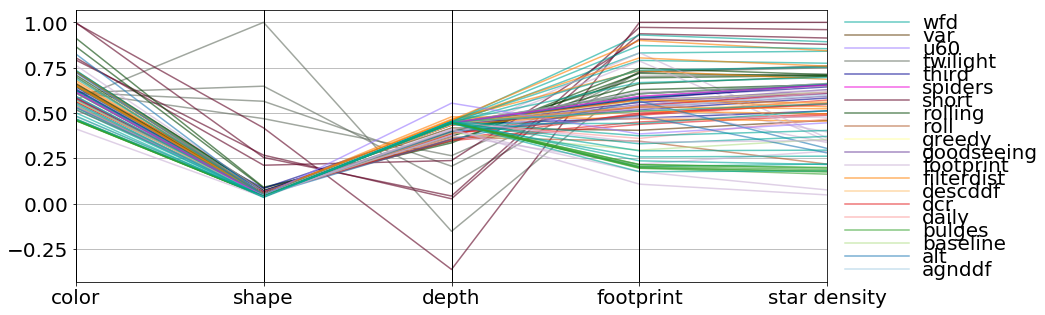

In [156]:
fig = plt.figure(figsize=(15,5))
pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])

ax = pd.plotting.parallel_coordinates(
    df, "db", color=colorList, alpha=0.6)
pl.xticks([0,1,2,3,4], labels=["color", "shape", "depth", "footprint", "star density"],
         fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(root2color):
    ax.plot([0, 1], [i,i], color=root2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
pl.savefig('../figures/opsimParallelCoord.pdf')

In [139]:

df.sort_values('shape', ascending=False)

,db,color,shape,depth,fpeg,fpgal
0,twilight_neo_mod1,0.574495,1.000000,-0.152775,0.701542,0.714423
1,twilight_neo_mod2,0.612204,0.647843,0.106855,0.727604,0.756398
2,twilight_neo_mod3,0.612752,0.564611,0.206344,0.726185,0.760227
3,twilight_neo_mod4,0.616686,0.468816,0.264326,0.724482,0.749966
4,short_exp_5ns_1expt,0.996284,0.417710,-0.363287,1.000000,1.000000
5,short_exp_2ns_1expt,0.792862,0.267437,0.026552,0.937092,0.913482
6,short_exp_5ns_5expt,1.000000,0.254596,0.041751,0.972425,0.959695
7,short_exp_2ns_5expt,0.805189,0.211788,0.237559,0.907435,0.878501
8,rolling_mod6_sdf_0.10,0.914251,0.090352,0.334905,0.746713,0.711328
9,rolling_mod6_sdf_0.20,0.867344,0.086227,0.344017,0.718806,0.704844


In [140]:
df.sort_values('color', ascending=False)

,db,color,shape,depth,fpeg,fpgal
6,short_exp_5ns_5expt,1.000000,0.254596,0.041751,0.972425,0.959695
4,short_exp_5ns_1expt,0.996284,0.417710,-0.363287,1.000000,1.000000
8,rolling_mod6_sdf_0.10,0.914251,0.090352,0.334905,0.746713,0.711328
9,rolling_mod6_sdf_0.20,0.867344,0.086227,0.344017,0.718806,0.704844
60,alt_roll_mod2_dust_sdf_0.20,0.826542,0.046082,0.355243,0.565036,0.303843
7,short_exp_2ns_5expt,0.805189,0.211788,0.237559,0.907435,0.878501
5,short_exp_2ns_1expt,0.792862,0.267437,0.026552,0.937092,0.913482
15,footprint_stuck_rollingv1.5,0.763908,0.066627,0.383455,0.580219,0.395228
41,wfd_depth_scale0.99_noddf,0.736703,0.050901,0.451991,0.930470,0.893046
12,rolling_mod3_sdf_0.10,0.733613,0.070421,0.373189,0.693738,0.706570


In [141]:
df.sort_values('depth', ascending=False)

,db,color,shape,depth,fpeg,fpgal
65,u60,0.534181,0.044895,0.554186,0.384353,0.445911
25,filterdist_indx5,0.651558,0.055517,0.478992,0.467742,0.455131
30,filterdist_indx8,0.668011,0.054957,0.465590,0.733422,0.685487
42,filterdist_indx2,0.700887,0.050720,0.460959,0.900151,0.843617
53,filterdist_indx7,0.729288,0.047804,0.458559,0.803897,0.758217
31,filterdist_indx6,0.611084,0.054724,0.455875,0.572793,0.533899
69,footprint_gp_smoothv1.5,0.553995,0.043787,0.453956,0.338426,0.348392
23,wfd_depth_scale0.90_noddf,0.660310,0.056237,0.452985,0.790181,0.774379
81,wfd_depth_scale0.70_noddf,0.530478,0.038227,0.452870,0.291127,0.295022
82,wfd_depth_scale0.75_noddf,0.556579,0.038041,0.452448,0.374042,0.403624


In [142]:
df.sort_values('fpeg', ascending=False)

,db,color,shape,depth,fpeg,fpgal
4,short_exp_5ns_1expt,0.996284,0.417710,-0.363287,1.000000,1.000000
6,short_exp_5ns_5expt,1.000000,0.254596,0.041751,0.972425,0.959695
5,short_exp_2ns_1expt,0.792862,0.267437,0.026552,0.937092,0.913482
41,wfd_depth_scale0.99_noddf,0.736703,0.050901,0.451991,0.930470,0.893046
7,short_exp_2ns_5expt,0.805189,0.211788,0.237559,0.907435,0.878501
42,filterdist_indx2,0.700887,0.050720,0.460959,0.900151,0.843617
57,wfd_depth_scale0.95_noddf,0.700505,0.046314,0.452350,0.872056,0.854667
27,footprint_big_sky_nouiyv1.5,0.720759,0.055458,0.374733,0.832372,0.361194
26,wfd_depth_scale0.99,0.690516,0.055474,0.443332,0.831000,0.840698
53,filterdist_indx7,0.729288,0.047804,0.458559,0.803897,0.758217


In [143]:
df.sort_values('fpgal', ascending=False)

,db,color,shape,depth,fpeg,fpgal
4,short_exp_5ns_1expt,0.996284,0.417710,-0.363287,1.000000,1.000000
6,short_exp_5ns_5expt,1.000000,0.254596,0.041751,0.972425,0.959695
5,short_exp_2ns_1expt,0.792862,0.267437,0.026552,0.937092,0.913482
41,wfd_depth_scale0.99_noddf,0.736703,0.050901,0.451991,0.930470,0.893046
7,short_exp_2ns_5expt,0.805189,0.211788,0.237559,0.907435,0.878501
57,wfd_depth_scale0.95_noddf,0.700505,0.046314,0.452350,0.872056,0.854667
42,filterdist_indx2,0.700887,0.050720,0.460959,0.900151,0.843617
26,wfd_depth_scale0.99,0.690516,0.055474,0.443332,0.831000,0.840698
23,wfd_depth_scale0.90_noddf,0.660310,0.056237,0.452985,0.790181,0.774379
2,twilight_neo_mod3,0.612752,0.564611,0.206344,0.726185,0.760227


In [144]:
[f for f in df.db if f.startswith('foot') ]

['footprint_stuck_rollingv1.5',
 'footprint_big_sky_dustv1.5',
 'footprint_big_sky_nouiyv1.5',
 'footprint_big_skyv1.5',
 'footprint_no_gp_northv1.5',
 'footprint_add_mag_cloudsv1.5',
 'footprint_big_wfdv1.5',
 'footprint_bluer_footprintv1.5',
 'footprint_standard_goalsv1.5',
 'footprint_gp_smoothv1.5',
 'footprint_newBv1.5',
 'footprint_newAv1.5']

In [146]:
df.sort_values('shape', ascending=False).set_index('db').loc[[
    f for f in df.sort_values('shape', ascending=False).db if f.startswith('foot') ]]

,color,shape,depth,fpeg,fpgal
db,,,,,
footprint_stuck_rollingv1.5,0.763908,0.066627,0.383455,0.580219,0.395228
footprint_big_sky_dustv1.5,0.609965,0.055707,0.394939,0.543563,0.336392
footprint_big_sky_nouiyv1.5,0.720759,0.055458,0.374733,0.832372,0.361194
footprint_big_skyv1.5,0.699488,0.055333,0.378291,0.786444,0.345190
footprint_no_gp_northv1.5,0.618449,0.050902,0.442162,0.615410,0.620683
footprint_add_mag_cloudsv1.5,0.593763,0.050203,0.446959,0.522514,0.614308
footprint_big_wfdv1.5,0.635437,0.050101,0.375559,0.218002,0.289355
footprint_bluer_footprintv1.5,0.572675,0.049451,0.409726,0.472992,0.477559
footprint_standard_goalsv1.5,0.617065,0.047617,0.441835,0.592186,0.650118


In [149]:
df2 = pd.DataFrame([df["db"], df['color'],
                     df[['color', 'shape']].cumsum(axis=1).iloc[:,1] / 2,
                    df[['color', 'shape', 'depth']].cumsum(axis=1).iloc[:,2] / 3,
             df[['color', 'shape', 'depth', 'fpeg']].cumsum(axis=1).iloc[:,3] / 4, 
    df[['color', 'shape', 'depth', 'fpeg', 'fpgal']].cumsum(axis=1).iloc[:,4] / 5]).T


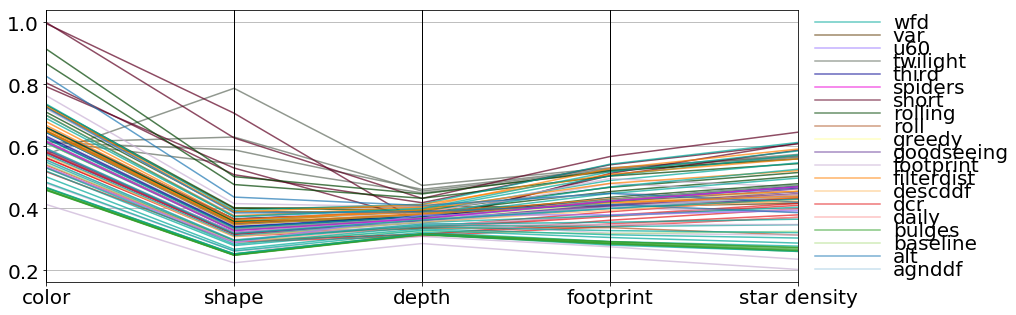

In [155]:
fig = plt.figure(figsize=(15,5))
pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])

ax = pd.plotting.parallel_coordinates(
    df2, "db", color=colorList, alpha=0.7)
pl.xticks([0,1,2,3, 4], labels=["color", "shape", "depth", "footprint", "star density"],
         fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(root2color):
    ax.plot([0, 1], [i,i], color=root2color[c], alpha=0.6)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
pl.savefig('../figures/opsimParallelCoord_cum.pdf')